In [1]:
import numpy as np
import pandas as pd
import nltk
from collections import Counter 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
from zipfile import ZipFile 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, chi2
import pickle

In [2]:
corpus = pd.read_csv("C:/Users/User/Downloads/TA/traindata.csv")
corpus.head()

,review,label
0,starter lah gituu,0
1,motor matic xeon karbu kemarin mati gak starte...,0
2,ya klw saring filter karbu tenaga klw pake sar...,1
3,sy honda matic vario esp habis oli mesin karna...,1
4,baik mesin,1


In [3]:
corpus_test = pd.read_csv("C:/Users/User/Downloads/TA/testdata.csv")
corpus_test.head()

,review,label
0,motor mio sporty ane setang getar sebab ya,0
1,maaf gan mesin motor honda beat fi,1
2,kalo kabel spul mio soul yg api warna om,0
3,motor karisma lampu papan monitor tanda sen la...,0
4,speedo meter mati indikator bensin ganti,0


In [4]:
corpus_all = pd.concat([corpus, corpus_test], axis=0)

In [5]:
corpus_all.shape

(505, 2)

In [6]:
corpus_mesin= corpus_all[corpus_all.label==1]

In [7]:
corpus_nonmesin= corpus_all[corpus_all.label==0]

In [8]:
vectorizer = CountVectorizer(ngram_range=(2,2)).fit(corpus['review'])
#print (X.vocabulary_)
#print(vectorizer.get_feature_names())
X = vectorizer.transform(corpus['review'])
print (X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
X_test = vectorizer.transform(corpus_test['review'])
print (X_test.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True).fit(X)
X = tfidf_transformer.transform(X)
print (X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
X_test = tfidf_transformer.transform(X_test)
print (X_test.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
# print idf values
##df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
#df_idf.sort_values(by=['idf_weights'])

In [12]:
X_test.shape

(101, 2731)

In [13]:
y= corpus['label'].values
print(y)

[0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0
 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0]


In [14]:
y_test= corpus_test['label'].values
print(y_test)

[0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1
 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0]


In [15]:
filename = 'bxy.p'
outfile = open(filename,'wb')
pickle.dump([X,y],outfile)
outfile.close()

In [16]:
filename = 'bxy_test.p'
outfile = open(filename,'wb')
pickle.dump([X_test,y_test],outfile)
outfile.close()

Text(0.5, 0, '$\\chi^2$')

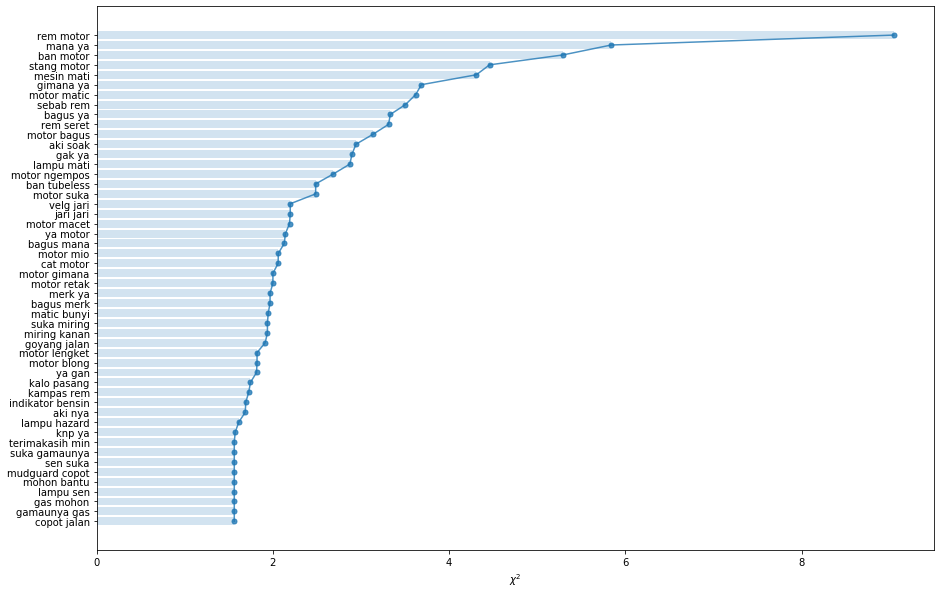

In [17]:
chi2score = chi2(X, y)[0]

plt.figure(figsize=(15,10))
wscores = list (zip(vectorizer.get_feature_names(), chi2score))
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list (zip(*wchi2[-50:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')